In [103]:
import pandas as pd
import numpy as np

In [104]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [105]:
train_df.head()
# test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
train_df.columns
# 'label' -> output image category
# all other pixels

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [107]:
x_train = train_df.drop(columns=["label"])
y_train = train_df["label"]
#y_train.head()

x_test = test_df.drop(columns=["label"])
y_test = test_df[["label"]]
#y_test.head()

In [108]:
# Normalization: We divide the pixel values by 255.0. This operation scales the pixel values from the original range of 0 to 255
# to a new range of 0 to 1. (for faster training, improves the stability, similar scale for all features)
# Adding Channel Dimension: CNNs expect input data in a specific format - [batch_size, height, width, channels]. The MNIST 
# Fashion Dataset contains grayscale images, so they have only one channel. 
# For grayscale images like those in the MNIST Fashion Dataset, there is only one channel because each pixel contains 
# only one value representing the intensity of the grayscale

# normalizing to scale of (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshaping the image in (28*28) pixels -> input formate CNN is [batch_size, height, width, channels]
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

### Conv2D -> layers are convolutional layers used for processing spatial data, such as images
### MaxPooling2D -> layers perform max pooling, which is used to reduce the spatial dimensions of the input volume. technique used to reduce the size of the input data. helps in reducing the computational complexity of the model by reducing the number of parameters .
### Flatten-> used to convert multi-dimensional data into a one-dimensional array,in the context of image processing, used to flatten the output of convolutional layers before passing it to a dense layer for classification.

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

# 1st layer => Add a 2D convolutional layer with 64 filters, each 3x3, using ReLU activation, with input shape of (28,28,1)
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))

# 2nd layer => Add a 2D MaxPooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd layer => Flatten the 2D output of the previous layer into a 1D array
model.add(Flatten())

# 4th layer =>
model.add(Dense(128, activation="relu"))

# 5th layer => 10 category output, softmax activation function-> used for multiclass classification
model.add(Dense(10, activation="softmax"))

# model compile => for multiclass classification, loss is crossEntropy
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# model summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 10816)             0         
                                                                 
 dense_30 (Dense)            (None, 128)               1384576   
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [110]:
# model fitting
model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.3974 - accuracy: 0.8585 - val_loss: 0.3261 - val_accuracy: 0.8841
Epoch 2/5
1500/1500 [==============================] - 35s 24ms/step - loss: 0.2685 - accuracy: 0.9030 - val_loss: 0.2658 - val_accuracy: 0.9032
Epoch 3/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2206 - accuracy: 0.9195 - val_loss: 0.2594 - val_accuracy: 0.9087
Epoch 4/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1848 - accuracy: 0.9321 - val_loss: 0.2550 - val_accuracy: 0.9114
Epoch 5/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1532 - accuracy: 0.9443 - val_loss: 0.2590 - val_accuracy: 0.9106


In [111]:
# model evaluation
loss, acc = model.evaluate(x_test, y_test)
print("test loss: ",loss)
print("test accuracy: ",acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2421 - accuracy: 0.9158
test loss:  0.24210087954998016
test accuracy:  0.9157999753952026


1/1 [==============================] - 0s 72ms/step
Predicted Item is:  t-shirt


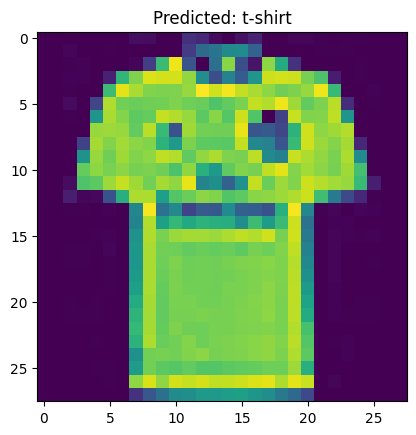

In [112]:
import matplotlib.pyplot as plt

# make predictions and display result
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneakers','bag','ankle boots']
prediction = model.predict(x_test[:1])
# np.argmax is a NumPy function that returns the index of the maximum value in an array.
prediction_label = labels[np.argmax(prediction)]
print("Predicted Item is: ", prediction_label)

# Display the first test image with its predicted label
plt.imshow(x_test[0].reshape(28, 28))
plt.title(f"Predicted: {prediction_label}")
plt.show()

What is Classification?
Classification is a type of supervised learning in machine learning that involves categorizing data into
predefined classes or categories based on a set of features or characteristics. It is used to predict the class
of new, unseen data based on the patterns learned from the labeled training data

Classification algorithms can vary in complexity, ranging from simple models such as decision trees and
k-nearest neighbors to more complex models such as support vector machines and neural networks. The
choice of algorithm depends on the nature of the data, the size of the dataset, and the desired level of
accuracy and interpretability.

What us CNN:
Convolutional Neural Networks (CNNs) are commonly used for image classification tasks, and they are
designed to automatically learn and extract features from input images. In a typical CNN architecture for image classification, there are several layers, including convolutional
layers (Conv2D), pooling layers(MaxPooling2D), and fully connected layers(Dense)

MNIST Dataset: 
The MNIST Fashion dataset is a collection of 70,000 grayscale images of 28x28 pixels, representing 10
different categories of clothing and accessories with each category containing 7,000 images. The categories include 
T-shirts/tops, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots

The training set contains 60,000 images, while the test set contains 10,000 images. The goal of
the dataset is to accurately classify the images into their respective categories.

multiclass classification problem:
Here are the general steps to perform Convolutional Neural Network (CNN) on the MNIST Fashion
dataset:
● Import the necessary libraries, including TensorFlow, Keras, NumPy, and Matplotlib.
● Load the dataset using Keras' built-in function, keras.datasets.fashion_mnist.load_data(). This
will provide the training and testing sets, which will be used to train and evaluate the CNN.
● Preprocess the data by normalizing the pixel values between 0 and 1, and reshaping the images to
be of size (28, 28, 1) for compatibility with the CNN.
● Define the CNN architecture, including the number and size of filters, activation functions, and
pooling layers. This can vary based on the specific problem being addressed.
● Compile the model by specifying the loss function, optimizer, and evaluation metrics. Common
choices include categorical cross-entropy, Adam optimizer, and accuracy metric.
● Train the CNN on the training set using the fit() function, specifying the number of epochs and
batch size.
● Evaluate the performance of the model on the testing set using the evaluate() function. This will
provide metrics such as accuracy and loss on the test set.
● Use the trained model to make predictions on new images, if desired, using the predict()
function.
